In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
iris=load_iris()

df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target

print("First 5 rows of the dataset: ")
print(df.head())

print("\nDataset Information: ")
print(df.info())

print("\n Missing Values: ")
print(df.isnull().sum())

# df = df.dropna()      # Remove rows with missing values
# df = df.fillna(value) # Replace missing values



First 5 rows of the dataset: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   tar

In [4]:
print("Basic Statistics of Numerical Columns:")
print(df.describe())

Basic Statistics of Numerical Columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
print("\n Median Values:")
print(df.median(numeric_only=True))


 Median Values:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64


In [7]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Group by species and compute mean of each feature
grouped_means = df.groupby('species').mean(numeric_only=True)
print(" Mean of numerical features by species:")
print(grouped_means)

 Mean of numerical features by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  target  
species                               
setosa                 0.246     0.0  
versicolor             1.326     1.0  
virginica              2.026     2.0  


/tmp/ipykernel_133/1670345482.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df.groupby('species').mean(numeric_only=True)


In [8]:
summary = " Iris Dataset Analysis Summary\n\n"
summary += " Group-wise Mean Values:\n"
summary += grouped_means.round(2).to_string() + "\n\n"

# Findings
summary += " Interesting Patterns and Insights:\n"
summary += "- Virginica has the largest petals and sepals on average.\n"
summary += "- Setosa has the smallest petals and widest sepals.\n"
summary += "- Petal size (length/width) is a strong differentiator between species.\n"
summary += "- Linear classification is likely possible due to clear separation in petal size.\n"

# Write to file
with open("iris_summary.txt", "w") as file:
    file.write(summary)

print(" Summary written to 'iris_summary.txt'")

 Summary written to 'iris_summary.txt'


/tmp/ipykernel_133/4262606803.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='Set2')
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


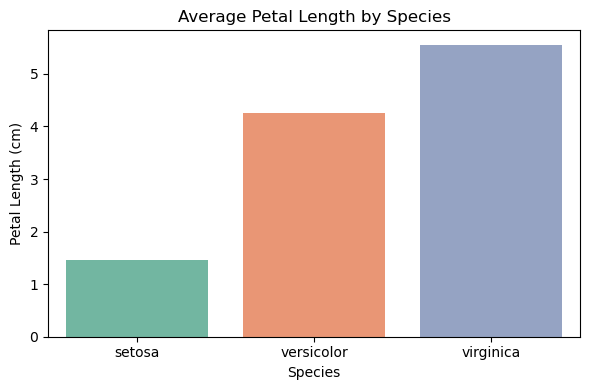

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='Set2')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.tight_layout()
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


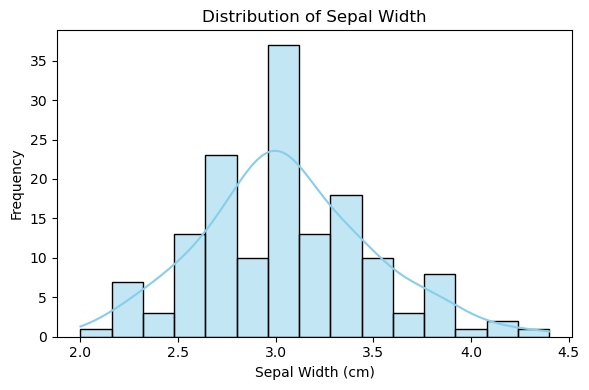

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['sepal width (cm)'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

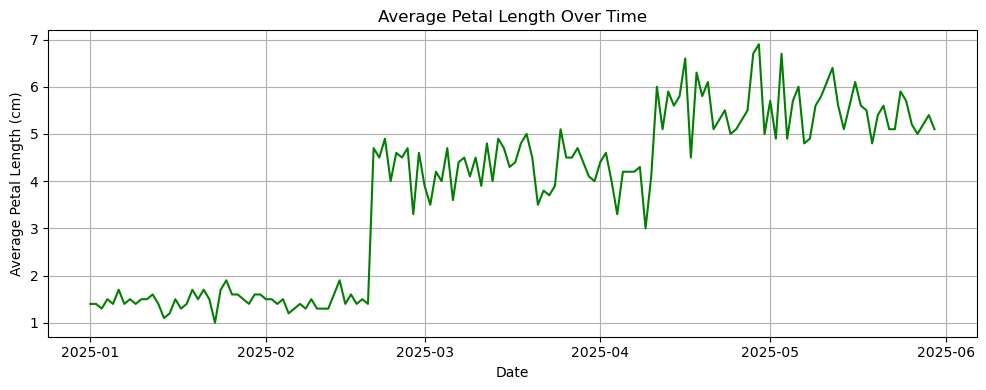

In [13]:
df['date'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

# Group by date and get average petal length per day
daily_avg = df.groupby('date')['petal length (cm)'].mean()

plt.figure(figsize=(10, 4))
plt.plot(daily_avg, color='green')
plt.title('Average Petal Length Over Time')
plt.xlabel('Date')
plt.ylabel('Average Petal Length (cm)')
plt.grid(True)
plt.tight_layout()
plt.show()

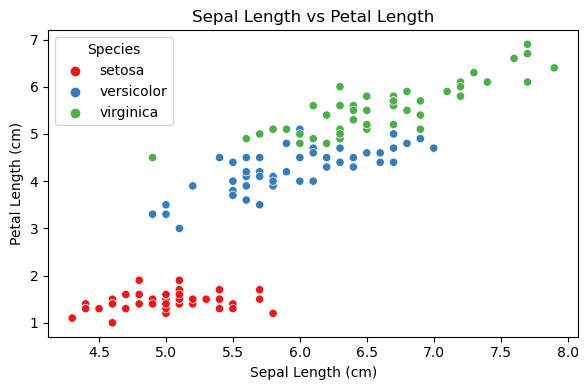

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='Set1')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()